# Data Aggregation and Group Operations

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
from numpy.random import randn

import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt

## GroupBy Mechanics

In [3]:
df = DataFrame({
    'key1': ['a','a','b','b','a'],
    'key2': ['A','B','A','B','A'],
    'data1': np.arange(0,5),
    'data2': np.arange(0,10,2)
})
df

,data1,data2,key1,key2
0,0,0,a,A
1,1,2,a,B
2,2,4,b,A
3,3,6,b,B
4,4,8,a,A


In [4]:
# 把 key1 的值当键，对 data1 column 进行分组
grouped = df['data1'].groupby(df['key1'])
grouped

In [5]:
for key, group in grouped:
    print key
    print group

a
0    0
1    1
4    4
Name: data1, dtype: int64
b
2    2
3    3
Name: data1, dtype: int64


In [6]:
# 求取各组平均值
grouped.mean()

key1
a    1.666667
b    2.500000
Name: data1, dtype: float64

In [7]:
# 把 key1, key2 的值当键，对 data1 column 进行分组求平均值
means = df['data1'].groupby([df['key1'], df['key2']]).mean()
means

key1  key2
a     A       2
      B       1
b     A       2
      B       3
Name: data1, dtype: int64

In [8]:
# 如不指定 columns，则对所有数值数据 (data1, data2) 分组
df.groupby('key1').mean()

,data1,data2
key1,,
a,1.666667,3.333333
b,2.500000,5.000000


In [9]:
# 可指定多组键进行分组
df.groupby(['key1', 'key2']).mean()

data1  data2
key1 key2              
a    A         2      4
     B         1      2
b    A         2      4
     B         3      6

### Iterating Over Groups

In [10]:
for name, group in df.groupby('key1'):
    print name
    print group

a
   data1  data2 key1 key2
0      0      0    a    A
1      1      2    a    B
4      4      8    a    A
b
   data1  data2 key1 key2
2      2      4    b    A
3      3      6    b    B


In [11]:
# 除了沿 index 轴，还可以沿 column 轴(axix=1) 进行分组
for type, group in df.groupby(df.dtypes, axis=1):
    print type
    print group

int64
   data1  data2
0      0      0
1      1      2
2      2      4
3      3      6
4      4      8
object
  key1 key2
0    a    A
1    a    B
2    b    A
3    b    B
4    a    A


### Selecting a Column or Subset of Columns

In [12]:
# df['data1'].groupby(df['key1']).count() 的语法糖
df.groupby('key1')['data1'].count()

key1
a    3
b    2
Name: data1, dtype: int64

### Grouping with Dicts and Series

In [13]:
people = DataFrame(
    np.arange(25).reshape((5,5)),
    columns=['a','b','c','d','e'],
    index=['one','two','three','four','five']
)
people

,a,b,c,d,e
one,0,1,2,3,4
two,5,6,7,8,9
three,10,11,12,13,14
four,15,16,17,18,19
five,20,21,22,23,24


In [14]:
# 透过 dict 转换
mapping = {'a': 'red', 'b': 'red', 'c': 'blue',
          'd': 'blue', 'e': 'red', 'f': 'orange'}

people.groupby(mapping, axis=1).sum()

,blue,red
one,5,5
two,15,20
three,25,35
four,35,50
five,45,65


In [15]:
# 透过 Series 转换 （index当做键）
map_series = Series(mapping)
people.groupby(map_series, axis=1).sum()

,blue,red
one,5,5
two,15,20
three,25,35
four,35,50
five,45,65


### Grouping with Functions

In [16]:
# 使用函数结果进行分组
people.groupby(len).sum()

,a,b,c,d,e
3,5,7,9,11,13
4,35,37,39,41,43
5,10,11,12,13,14


In [17]:
# 使用匿名函数结果进行分组
people.groupby(lambda x: x[0]).sum()

,a,b,c,d,e
f,35,37,39,41,43
o,0,1,2,3,4
t,15,17,19,21,23


### Grouping by Index Levels

In [18]:
# 创建 column 阶层
columns = pd.MultiIndex.from_arrays(
    [['B','B','B','R','R'], [1,3,5,1,3]], 
    names=['color', 'num'])

hier_df = DataFrame(randn(2,5), columns=columns)
hier_df

color         B                             R          
num           1         3         5         1         3
0     -0.231042  0.501296  0.342847  1.992484 -1.334230
1      1.795974 -0.159177 -0.110945 -0.255740  1.733277

In [19]:
# 根据指定 level 分组
hier_df.groupby(level='color', axis=1).count()

color,B,R
0,3,2
1,3,2


## Data Aggregation

In [20]:
grouped = df.groupby('key1')
for key, group in grouped:
    print key
    print group

a
   data1  data2 key1 key2
0      0      0    a    A
1      1      2    a    B
4      4      8    a    A
b
   data1  data2 key1 key2
2      2      4    b    A
3      3      6    b    B


In [21]:
# 使用 quantile 计算样本分位数
grouped['data1'].quantile(0.5)

key1
a    1.0
b    2.5
Name: data1, dtype: float64

In [22]:
# 使用 agg 传入函数
def peak_to_peak(arr):
    return arr.max() - arr.min()

grouped.agg(peak_to_peak)

,data1,data2
key1,,
a,4,8
b,1,2


In [23]:
# 计算分组平均数
grouped['data1'].mean()

key1
a    1.666667
b    2.500000
Name: data1, dtype: float64

In [24]:
# 计算分组中位数
grouped['data1'].median()

key1
a    1.0
b    2.5
Name: data1, dtype: float64

### Column-wise and Multiple Function Application

In [25]:
tips = pd.read_csv('ch08/tips.csv')
tips[:3]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [26]:
# 加入 tip_pct column
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips[:3]

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587


In [27]:
# 按照 sex, smoker 分组
grouped = tips.groupby(['sex','smoker'])

In [28]:
# 针对 tip_pct 数值，分组计算平均
grouped['tip_pct'].agg('mean').unstack()

smoker,No,Yes
sex,,
Female,0.156921,0.182150
Male,0.160669,0.152771


In [29]:
# 针对 tip_pct 数值，分组计算 mean, std, peak_to_peak
grouped['tip_pct'].agg(['mean', 'std', peak_to_peak])

mean       std  peak_to_peak
sex    smoker                                  
Female No      0.156921  0.036421      0.195876
       Yes     0.182150  0.071595      0.360233
Male   No      0.160669  0.041849      0.220186
       Yes     0.152771  0.090588      0.674707

In [30]:
# 变更分组计算的 column name
grouped['tip_pct'].agg([('MEAN', 'mean'), ('STD','std')])

MEAN       STD
sex    smoker                    
Female No      0.156921  0.036421
       Yes     0.182150  0.071595
Male   No      0.160669  0.041849
       Yes     0.152771  0.090588

In [31]:
# 针对不同 column，进行不同的分组计算
grouped.agg({'tip': 'max', 'size': 'sum'})

tip  size
sex    smoker            
Female No       5.2   140
       Yes      6.5    74
Male   No       9.0   263
       Yes     10.0   150

### Returning Aggregated Data in “unindexed” Form

In [32]:
# 把分组键变成 column
tips.groupby(['sex','smoker'], as_index=False).mean()

,sex,smoker,total_bill,tip,size,tip_pct
0,Female,No,18.105185,2.773519,2.592593,0.156921
1,Female,Yes,17.977879,2.931515,2.242424,0.182150
2,Male,No,19.791237,3.113402,2.711340,0.160669
3,Male,Yes,22.284500,3.051167,2.500000,0.152771


## Group-wise Operations and Transformations

In [33]:
people.groupby(len).mean()

,a,b,c,d,e
3,2.5,3.5,4.5,5.5,6.5
4,17.5,18.5,19.5,20.5,21.5
5,10.0,11.0,12.0,13.0,14.0


In [34]:
# 将函数应用到各个分组
people.groupby(len).transform('mean')

,a,b,c,d,e
one,2.5,3.5,4.5,5.5,6.5
two,2.5,3.5,4.5,5.5,6.5
three,10.0,11.0,12.0,13.0,14.0
four,17.5,18.5,19.5,20.5,21.5
five,17.5,18.5,19.5,20.5,21.5


In [35]:
# 将函数应用到各个分组
people.groupby(len).transform(lambda g: g - g.mean())

,a,b,c,d,e
one,-2.5,-2.5,-2.5,-2.5,-2.5
two,2.5,2.5,2.5,2.5,2.5
three,0.0,0.0,0.0,0.0,0.0
four,-2.5,-2.5,-2.5,-2.5,-2.5
five,2.5,2.5,2.5,2.5,2.5


### Apply: General split-apply-combine

In [36]:
# 根据 column 找出最高几笔
def top(df, n=5, column='tip_pct'):
    return df.sort_values(by=column)[-n:]

top(tips)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
183,23.17,6.50,Male,Yes,Sun,Dinner,4,0.280535
232,11.61,3.39,Male,No,Sat,Dinner,2,0.291990
67,3.07,1.00,Female,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Female,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Male,Yes,Sun,Dinner,2,0.710345


In [37]:
# 根据 smoker 分组，找出每组最高几笔
tips.groupby('smoker').apply(top)

total_bill   tip     sex smoker   day    time  size   tip_pct
smoker                                                                   
No     88        24.71  5.85    Male     No  Thur   Lunch     2  0.236746
       185       20.69  5.00    Male     No   Sun  Dinner     5  0.241663
       51        10.29  2.60  Female     No   Sun  Dinner     2  0.252672
       149        7.51  2.00    Male     No  Thur   Lunch     2  0.266312
       232       11.61  3.39    Male     No   Sat  Dinner     2  0.291990
Yes    109       14.31  4.00  Female    Yes   Sat  Dinner     2  0.279525
       183       23.17  6.50    Male    Yes   Sun  Dinner     4  0.280535
       67         3.07  1.00  Female    Yes   Sat  Dinner     1  0.325733
       178        9.60  4.00  Female    Yes   Sun  Dinner     2  0.416667
       172        7.25  5.15    Male    Yes   Sun  Dinner     2  0.710345

In [38]:
# 分组后，舍弃分组键
tips.groupby('smoker', group_keys=False).apply(top)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
88,24.71,5.85,Male,No,Thur,Lunch,2,0.236746
185,20.69,5.00,Male,No,Sun,Dinner,5,0.241663
51,10.29,2.60,Female,No,Sun,Dinner,2,0.252672
149,7.51,2.00,Male,No,Thur,Lunch,2,0.266312
232,11.61,3.39,Male,No,Sat,Dinner,2,0.291990
109,14.31,4.00,Female,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Male,Yes,Sun,Dinner,4,0.280535
67,3.07,1.00,Female,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Female,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Male,Yes,Sun,Dinner,2,0.710345


### Quantile and Bucket Analysis

In [39]:
frame = DataFrame({'data1': randn(1000), 'data2': randn(1000)})

In [40]:
# 根据 data1 的数值，分成四个等长的区间
factor = pd.cut(frame.data1, 4)
factor[:4]

0     (-0.194, 1.234]
1    (-1.621, -0.194]
2    (-1.621, -0.194]
3      (1.234, 2.661]
Name: data1, dtype: category
Categories (4, object): [(-3.0542, -1.621] < (-1.621, -0.194] < (-0.194, 1.234] < (1.234, 2.661]]

In [41]:
# 根据（数值）区间分组
grouped = frame['data2'].groupby(factor)
grouped.apply(lambda x: x.describe()).unstack()

,count,mean,std,min,25%,50%,75%,max
data1,,,,,,,,
"(-3.0542, -1.621]",56.0,-0.026109,0.952747,-2.305406,-0.632656,-0.010753,0.338043,2.588530
"(-1.621, -0.194]",388.0,0.014225,0.988509,-2.627958,-0.671218,0.054446,0.723786,2.444812
"(-0.194, 1.234]",465.0,0.036768,0.984001,-3.588220,-0.608162,-0.042956,0.747153,3.218775
"(1.234, 2.661]",91.0,-0.005951,0.973533,-2.433495,-0.636635,-0.059974,0.813916,1.933214


In [42]:
# 根据 data1 的样本数，分成四个等长的区间
grouping = pd.qcut(frame.data1, 4, labels=False)
grouping[:4]

0    3
1    1
2    0
3    3
Name: data1, dtype: int64

In [43]:
# 根据（样本数）区间分组
grouped = frame['data2'].groupby(grouping)
grouped.apply(lambda x: x.describe()).unstack()

,count,mean,std,min,25%,50%,75%,max
data1,,,,,,,,
0,250.0,-0.001194,0.953708,-2.627958,-0.620164,0.021341,0.531348,2.588530
1,250.0,0.014332,0.990489,-2.298730,-0.680046,-0.006920,0.719367,3.218775
2,250.0,0.046379,1.048002,-3.588220,-0.635850,-0.053598,0.811949,2.574339
3,250.0,0.022934,0.936618,-2.433495,-0.602476,-0.001592,0.740724,3.129710


### Example: Filling Missing Values with Group-specific Values

In [44]:
s = Series(randn(6))
s[::2] = np.nan
s

0         NaN
1    0.208746
2         NaN
3   -1.588461
4         NaN
5   -0.583679
dtype: float64

In [45]:
# 使用平均数填充缺失值
s.fillna(s.mean())

0   -0.654465
1    0.208746
2   -0.654465
3   -1.588461
4   -0.654465
5   -0.583679
dtype: float64

In [46]:
chars = ['a','b','c','d','e','f','g','h']
group_key = ['red']*4 + ['blue']*4

data = Series(randn(8), index=chars)
data[['b','d','g']] = np.nan
data

a   -2.318213
b         NaN
c    0.576635
d         NaN
e    1.667074
f   -0.864615
g         NaN
h   -1.047929
dtype: float64

In [47]:
# 使用分组平均数填充缺失值
fill_mean = lambda g: g.fillna(g.mean())
data.groupby(group_key).apply(fill_mean)

a   -2.318213
b   -0.870789
c    0.576635
d   -0.870789
e    1.667074
f   -0.864615
g   -0.081823
h   -1.047929
dtype: float64

In [48]:
# 使用分组缺省值填充缺失值
fill_values = {'red': -0.5, 'blue': 0.5}
fill_func = lambda g: g.fillna(fill_values[g.name])
data.groupby(group_key).apply(fill_func)

a   -2.318213
b   -0.500000
c    0.576635
d   -0.500000
e    1.667074
f   -0.864615
g    0.500000
h   -1.047929
dtype: float64

### Example: Random Sampling and Permutation

In [49]:
suits = ['H', 'S', 'C', 'D']
card_val = [1,2,3,4,5,6,7,8,9,10,10,10,10]*4
base_names = ['A'] + range(2,11) + ['J','Q','K']
cards = []
for suit in suits:
    cards.extend(str(num) + suit for num in base_names)

deck = Series(card_val, index=cards)
deck[:13]

AH      1
2H      2
3H      3
4H      4
5H      5
6H      6
7H      7
8H      8
9H      9
10H    10
JH     10
QH     10
KH     10
dtype: int64

In [50]:
# 随机抽取
def draw(deck, n=5):
    return deck.take(np.random.permutation(len(deck))[:n])

draw(deck)

6D    6
7D    7
5C    5
6S    6
2D    2
dtype: int64

In [51]:
# 分组随机抽取
get_suit = lambda card: card[-1]
deck.groupby(get_suit).apply(draw, n=2)

C  10C    10
   QC     10
D  9D      9
   7D      7
H  KH     10
   JH     10
S  6S      6
   4S      4
dtype: int64

### Example: Group Weighted Average and Correlation

In [52]:
df = DataFrame({
    'category': ['a','a','a','a','b','b','b','b'],
    'data': [1]*8,
    'weights': np.random.rand(8)
})

df

,category,data,weights
0,a,1,0.769128
1,a,1,0.288489
2,a,1,0.020588
3,a,1,0.552213
4,b,1,0.281533
5,b,1,0.164724
6,b,1,0.322242
7,b,1,0.817562


In [53]:
# 分组加权平均
grouped = df.groupby('category')
get_wavg = lambda g: np.average(g['data'], weights=g['weights'])
grouped.apply(get_wavg)

category
a    1.0
b    1.0
dtype: float64

In [54]:
close_px = pd.read_csv('ch09/stock_px.csv',
                       parse_dates=True,
                       index_col=0)
close_px[:4]

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93


In [55]:
rets = close_px.pct_change().dropna()
by_year = rets.groupby(lambda x: x.year)

# 各家股价与 SPX 的相关系数
by_year.apply(lambda x: x.corrwith(x['SPX']))

,AAPL,MSFT,XOM,SPX
2003,0.541124,0.745174,0.661265,1.0
2004,0.374283,0.588531,0.557742,1.0
2005,0.467540,0.562374,0.631010,1.0
2006,0.428267,0.406126,0.518514,1.0
2007,0.508118,0.658770,0.786264,1.0
2008,0.681434,0.804626,0.828303,1.0
2009,0.707103,0.654902,0.797921,1.0
2010,0.710105,0.730118,0.839057,1.0
2011,0.691931,0.800996,0.859975,1.0


In [56]:
# AAPL 与 MSFT 的相关系数
by_year.apply(lambda g: g['AAPL'].corr(g['MSFT']))

2003    0.480868
2004    0.259024
2005    0.300093
2006    0.161735
2007    0.417738
2008    0.611901
2009    0.432738
2010    0.571946
2011    0.581987
dtype: float64

### Example: Group-wise Linear Regression

In [57]:
import statsmodels.api as sm
def regress(data, yvar, xvars):
    Y = data[yvar]
    X = data[xvars]
    X['intercept'] = 1
    result = sm.OLS(Y, X).fit()
    return result.params

by_year.apply(regress, 'AAPL', ['SPX'])

,SPX,intercept
2003,1.195406,0.000710
2004,1.363463,0.004201
2005,1.766415,0.003246
2006,1.645496,0.000080
2007,1.198761,0.003438
2008,0.968016,-0.001110
2009,0.879103,0.002954
2010,1.052608,0.001261
2011,0.806605,0.001514


## Pivot Tables and Cross-Tabulation

In [58]:
# 根据 sex, smoker分组，计算平均
tips.pivot_table(index=['sex', 'smoker'])

size       tip   tip_pct  total_bill
sex    smoker                                          
Female No      2.592593  2.773519  0.156921   18.105185
       Yes     2.242424  2.931515  0.182150   17.977879
Male   No      2.711340  3.113402  0.160669   19.791237
       Yes     2.500000  3.051167  0.152771   22.284500

In [59]:
tips.groupby(['sex','smoker']).mean()

total_bill       tip      size   tip_pct
sex    smoker                                          
Female No       18.105185  2.773519  2.592593  0.156921
       Yes      17.977879  2.931515  2.242424  0.182150
Male   No       19.791237  3.113402  2.711340  0.160669
       Yes      22.284500  3.051167  2.500000  0.152771

In [60]:
# 根据 sex, day 分组，计算 tip_pct, size 平均，smoker 放在 column
tips.pivot_table(['tip_pct', 'size'],
                 index=['sex', 'day'],
                 columns='smoker')

tip_pct                size          
smoker             No       Yes        No       Yes
sex    day                                         
Female Fri   0.165296  0.209129  2.500000  2.000000
       Sat   0.147993  0.163817  2.307692  2.200000
       Sun   0.165710  0.237075  3.071429  2.500000
       Thur  0.155971  0.163073  2.480000  2.428571
Male   Fri   0.138005  0.144730  2.000000  2.125000
       Sat   0.162132  0.139067  2.656250  2.629630
       Sun   0.158291  0.173964  2.883721  2.600000
       Thur  0.165706  0.164417  2.500000  2.300000

In [61]:
tips.groupby(['sex', 'day','smoker'])['tip_pct','size'].mean().unstack()

tip_pct                size          
smoker             No       Yes        No       Yes
sex    day                                         
Female Fri   0.165296  0.209129  2.500000  2.000000
       Sat   0.147993  0.163817  2.307692  2.200000
       Sun   0.165710  0.237075  3.071429  2.500000
       Thur  0.155971  0.163073  2.480000  2.428571
Male   Fri   0.138005  0.144730  2.000000  2.125000
       Sat   0.162132  0.139067  2.656250  2.629630
       Sun   0.158291  0.173964  2.883721  2.600000
       Thur  0.165706  0.164417  2.500000  2.300000

In [62]:
# 使用 margins=True 添加分项小计
tips.pivot_table(['tip_pct', 'size'],
                 index=['sex','day'],
                 columns='smoker',
                 margins=True)

tip_pct                          size                    
smoker             No       Yes       All        No       Yes       All
sex    day                                                             
Female Fri   0.165296  0.209129  0.199388  2.500000  2.000000  2.111111
       Sat   0.147993  0.163817  0.156470  2.307692  2.200000  2.250000
       Sun   0.165710  0.237075  0.181569  3.071429  2.500000  2.944444
       Thur  0.155971  0.163073  0.157525  2.480000  2.428571  2.468750
Male   Fri   0.138005  0.144730  0.143385  2.000000  2.125000  2.100000
       Sat   0.162132  0.139067  0.151577  2.656250  2.629630  2.644068
       Sun   0.158291  0.173964  0.162344  2.883721  2.600000  2.810345
       Thur  0.165706  0.164417  0.165276  2.500000  2.300000  2.433333
All          0.159328  0.163196  0.160803  2.668874  2.408602  2.569672

In [63]:
# 使用 aggfunc 指定其他聚合函数
tips.pivot_table('tip_pct', 
                 index=['sex','smoker'],
                 columns='day',
                 aggfunc=len,
                 margins=True)

day             Fri   Sat   Sun  Thur    All
sex    smoker                               
Female No       2.0  13.0  14.0  25.0   54.0
       Yes      7.0  15.0   4.0   7.0   33.0
Male   No       2.0  32.0  43.0  20.0   97.0
       Yes      8.0  27.0  15.0  10.0   60.0
All            19.0  87.0  76.0  62.0  244.0

In [64]:
# 使用 fill_value 填充缺失值
tips.pivot_table('size',
                index=['time','sex','smoker'],
                columns='day',
                aggfunc='sum',
                fill_value=0)

day                   Fri  Sat  Sun  Thur
time   sex    smoker                     
Dinner Female No        2   30   43     2
              Yes       8   33   10     0
       Male   No        4   85  124     0
              Yes      12   71   39     0
Lunch  Female No        3    0    0    60
              Yes       6    0    0    17
       Male   No        0    0    0    50
              Yes       5    0    0    23

### Cross-Tabulations: Crosstab

In [65]:
data = DataFrame({
    'Sample': [1,2,3,4,5,6,7,8,9,10],
    'Gender': ['F','M','F','M','M','M','F','F','M','F'],
    'Handedness': ['R','L','R','R','L','R','R','L','R','R']
})

data

,Gender,Handedness,Sample
0,F,R,1
1,M,L,2
2,F,R,3
3,M,R,4
4,M,L,5
5,M,R,6
6,F,R,7
7,F,L,8
8,M,R,9
9,F,R,10


In [66]:
# 计算分组频率
pd.crosstab(data.Gender,
            data.Handedness,
            margins=True)

Handedness,L,R,All
Gender,,,
F,1,4,5
M,2,3,5
All,3,7,10


In [67]:
data.groupby(['Gender','Handedness']).apply(len).unstack()

Handedness,L,R
Gender,,
F,1,4
M,2,3


In [68]:
# crosstab 前两个参数可以是数组、Series、数组列表
pd.crosstab([tips.time, tips.day],
           tips.smoker,
           margins=True)

smoker        No  Yes  All
time   day                
Dinner Fri     3    9   12
       Sat    45   42   87
       Sun    57   19   76
       Thur    1    0    1
Lunch  Fri     1    6    7
       Thur   44   17   61
All          151   93  244

In [69]:
tips.groupby(['time', 'day', 'smoker']).apply(len).unstack().fillna(0)

smoker         No   Yes
time   day             
Dinner Fri    3.0   9.0
       Sat   45.0  42.0
       Sun   57.0  19.0
       Thur   1.0   0.0
Lunch  Fri    1.0   6.0
       Thur  44.0  17.0

## Example: 2012 Federal Election Commission Database

In [70]:
fec = pd.read_csv('ch09/P00000001-ALL.csv', low_memory=False)

In [71]:
fec.ix[123456]

cmte_id                             C00431445
cand_id                             P80003338
cand_nm                         Obama, Barack
contbr_nm                         ELLMAN, IRA
contbr_city                             TEMPE
contbr_st                                  AZ
contbr_zip                          852816719
contbr_employer      ARIZONA STATE UNIVERSITY
contbr_occupation                   PROFESSOR
contb_receipt_amt                          50
contb_receipt_dt                    01-DEC-11
receipt_desc                              NaN
memo_cd                                   NaN
memo_text                                 NaN
form_tp                                 SA17A
file_num                               772372
Name: 123456, dtype: object

In [72]:
# 找出所有候选人名单
unique_cands = fec.cand_nm.unique()

In [73]:
# 使用 dict 说明党派关系
parties = {
    'Bachmann, Michelle': 'Republican',
    'Cain, Herman': 'Republican', 
    'Gingrich, Newt': 'Republican',
    'Huntsman, Jon': 'Republican',
    'Johnson, Gary Earl': 'Republican',
    'McCotter, Thaddeus G': 'Republican',
    'Obama, Barack': 'Democrat',
    'Paul, Ron': 'Republican',
    'Pawlenty, Timothy': 'Republican',
    'Perry, Rick': 'Republican',
    "Roemer, Charles E. 'Buddy' III": 'Republican',
    'Romney, Mitt': 'Republican',
    'Santorum, Rick': 'Republican'
}

In [74]:
fec.cand_nm[123456:123461]

123456    Obama, Barack
123457    Obama, Barack
123458    Obama, Barack
123459    Obama, Barack
123460    Obama, Barack
Name: cand_nm, dtype: object

In [75]:
fec.cand_nm[123456:123461].map(parties)

123456    Democrat
123457    Democrat
123458    Democrat
123459    Democrat
123460    Democrat
Name: cand_nm, dtype: object

In [76]:
# 添加 party 属性
fec['party'] = fec.cand_nm.map(parties)

In [77]:
fec['party'].value_counts()

Democrat      593746
Republican    407985
Name: party, dtype: int64

In [78]:
# 数据包含退款
(fec.contb_receipt_amt > 0).value_counts()

True     991475
False     10256
Name: contb_receipt_amt, dtype: int64

In [79]:
# 为简化流程，限定数据集只有正的出资额
fec = fec[fec.contb_receipt_amt > 0]

In [80]:
# 准备 Barack Obama, Mitt Romney 的子集
fec_mrbo = fec[fec.cand_nm.isin(['Obama, Barack', 'Romney, Mitt'])]

### Donation Statistics by Occupation and Employer

In [81]:
# 根据职业算出出资总额
fec.contbr_occupation.value_counts()[:10]

RETIRED                                   233990
INFORMATION REQUESTED                      35107
ATTORNEY                                   34286
HOMEMAKER                                  29931
PHYSICIAN                                  23432
INFORMATION REQUESTED PER BEST EFFORTS     21138
ENGINEER                                   14334
TEACHER                                    13990
CONSULTANT                                 13273
PROFESSOR                                  12555
Name: contbr_occupation, dtype: int64

In [82]:
# 将多个职业映射到同一个
occ_mapping = {
    'INFORMATION REQUESTED PER BEST EFFORTS': 'NOT PROVIDED',
    'INFORMATION REQUESTED': 'NOT PROVIDED',
    'INFORMATION REQUESTED (BEST EFFORTS)': 'NOT PROVIDED',
    'C.E.O.': 'CEO'
}

f = lambda x: occ_mapping.get(x, x)
fec.contbr_occupation = fec.contbr_occupation.map(f)

In [83]:
# 将多个雇主类型映射到同一种
emp_mapping = {
    'INFORMATION REQUESTED PER BEST EFFORTS': 'NOT PROVIDED',
    'INFORMATION REQUESTED': 'NOT PROVIDED',
    'SELF': 'SELF-EMPLOYED',
    'SELF EMPLOYED': 'SELF-EMPLOYED'
}

f = lambda x: emp_mapping.get(x, x)
fec.contbr_employer = fec.contbr_employer.map(f)

In [84]:
by_occupation = fec.pivot_table('contb_receipt_amt',
                               index='contbr_occupation',
                               columns='party',
                               aggfunc='sum')



In [85]:
over_2mm = by_occupation[by_occupation.sum(1) > 2000000]
over_2mm

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7.477194e+06
CEO,2074974.79,4.211041e+06
CONSULTANT,2459912.71,2.544725e+06
ENGINEER,951525.55,1.818374e+06
EXECUTIVE,1355161.05,4.138850e+06
HOMEMAKER,4248875.80,1.363428e+07
INVESTOR,884133.00,2.431769e+06
LAWYER,3160478.87,3.912243e+05
MANAGER,762883.22,1.444532e+06


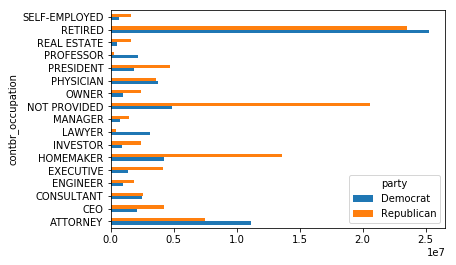

In [86]:
over_2mm.plot(kind='barh')

In [87]:
def get_top_amounts(group, key, n=5):
    totals = group.groupby(key)['contb_receipt_amt'].sum() 
    return totals.sort_values(ascending=False)[:n]

In [88]:
grouped = fec_mrbo.groupby('cand_nm')

In [89]:
# 根据职业进行聚合
grouped.apply(get_top_amounts, 'contbr_occupation', n=7)

cand_nm        contbr_occupation                     
Obama, Barack  RETIRED                                   25305116.38
               ATTORNEY                                  11141982.97
               INFORMATION REQUESTED                      4866973.96
               HOMEMAKER                                  4248875.80
               PHYSICIAN                                  3735124.94
               LAWYER                                     3160478.87
               CONSULTANT                                 2459912.71
Romney, Mitt   RETIRED                                   11508473.59
               INFORMATION REQUESTED PER BEST EFFORTS    11396894.84
               HOMEMAKER                                  8147446.22
               ATTORNEY                                   5364718.82
               PRESIDENT                                  2491244.89
               EXECUTIVE                                  2300947.03
               C.E.O.                            

In [90]:
# 根据雇主进行聚合
grouped.apply(get_top_amounts, 'contbr_employer', n=10)

cand_nm        contbr_employer                       
Obama, Barack  RETIRED                                   22694358.85
               SELF-EMPLOYED                             17080985.96
               NOT EMPLOYED                               8586308.70
               INFORMATION REQUESTED                      5053480.37
               HOMEMAKER                                  2605408.54
               SELF                                       1076531.20
               SELF EMPLOYED                               469290.00
               STUDENT                                     318831.45
               VOLUNTEER                                   257104.00
               MICROSOFT                                   215585.36
Romney, Mitt   INFORMATION REQUESTED PER BEST EFFORTS    12059527.24
               RETIRED                                   11506225.71
               HOMEMAKER                                  8147196.22
               SELF-EMPLOYED                     

### 对出资额分组

In [91]:
bins = np.array([0,1,10,100,1000,10000,100000,1000000,10000000])
labels = pd.cut(fec_mrbo.contb_receipt_amt, bins)

In [92]:
# 根据候选人姓名及出资标签对数据进行分组
grouped = fec_mrbo.groupby(['cand_nm', labels])

In [93]:
grouped.size().unstack(0)

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493.0,77.0
"(1, 10]",40070.0,3681.0
"(10, 100]",372280.0,31853.0
"(100, 1000]",153991.0,43357.0
"(1000, 10000]",22284.0,26186.0
"(10000, 100000]",2.0,1.0
"(100000, 1000000]",3.0,NaN
"(1000000, 10000000]",4.0,NaN


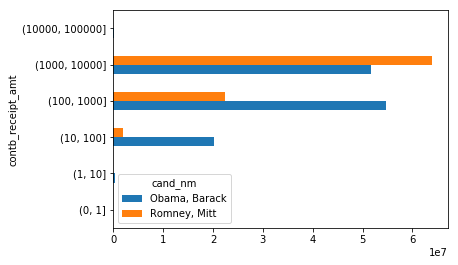

In [94]:
# 图形化候选人各种赞助比例
bucket_sums = grouped.contb_receipt_amt.sum().unstack(0)
bucket_sums[:-2].plot(kind='barh')

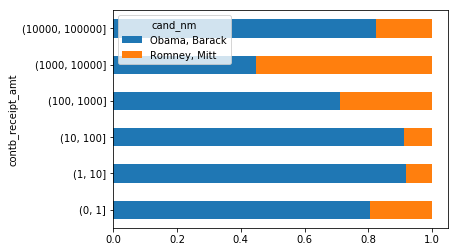

In [95]:
# 图形化候选人各种赞助比例
normed_sums = bucket_sums.div(bucket_sums.sum(axis=1), axis=0)
normed_sums[:-2].plot(kind='barh', stacked=True)

### 根据州统计赞助信息

In [96]:
grouped = fec_mrbo.groupby(['cand_nm', 'contbr_st'])
totals = grouped.contb_receipt_amt.sum().unstack(0).fillna(0)
totals = totals[totals.sum(1) > 100000]
totals[:10]

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,281840.15,86204.24
AL,543123.48,527303.51
AR,359247.28,105556.00
AZ,1506476.98,1888436.23
CA,23824984.24,11237636.60
CO,2132429.49,1506714.12
CT,2068291.26,3499475.45
DC,4373538.80,1025137.50
DE,336669.14,82712.00


In [97]:
percent = totals.div(totals.sum(1), axis=0)
percent[:10]

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,0.765778,0.234222
AL,0.507390,0.492610
AR,0.772902,0.227098
AZ,0.443745,0.556255
CA,0.679498,0.320502
CO,0.585970,0.414030
CT,0.371476,0.628524
DC,0.810113,0.189887
DE,0.802776,0.197224


In [98]:
from mpl_toolkits.basemap import Basemap, cm
import numpy as np
from matplotlib import rcParams
from matplotlib.collections import LineCollection
import matplotlib.pyplot as plt

In [99]:
from shapelib import ShapeFile
import dbflib

ImportError: No module named shapelib